Health Analytics Group Project

Data Cleaning, Feature Engineering & EDA

Dataset: https://www.kaggle.com/alexteboul/heart-disease-health-indicators-dataset?select=heart_disease_health_indicators_BRFSS2015.csv

Data Dictionary: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

In [24]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import scipy.stats
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import brier_score_loss
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,make_scorer
from sklearn.decomposition import PCA
import sklearn.model_selection as cv
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("final_data.csv")
df=pd.DataFrame(df)
df=df.drop("Unnamed: 0", axis=1)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,NoDiabetes,PreDiabetes,HasDiabetes,ExcellentGenHealth,VeryGoodGenHealth,GoodGenHealth,FairGenHealth,PoorGenHealth,Age18to24,Age25to29,Age30to34,Age35to39,Age40to44,Age45to49,Age50to54,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,Age80Plus,EducationNoElementary,EducationElementary,EducationSomeHS,EducationHSGrad,EducationSomeCollege,EducationCollegeGrad,IncomeUnder10k,Income10kto15k,Income15kto20k,Income20kto25k,Income25kto35k,Income35kto50k,Income50kto75k,IncomeOver75k,Male,Female
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,18.0,15.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,30.0,30.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [3]:
#df.info()

In [4]:
df.shape

(253680, 53)

In [5]:
#df.isnull().sum()

In [6]:
pd.crosstab(df['HeartDiseaseorAttack'], df['Male'])

Male,0,1
HeartDiseaseorAttack,,
0.0,98018,131769
1.0,13688,10205


#### Train test split

In [7]:
import sklearn.model_selection as cv
(train,test) = cv.train_test_split(df, test_size=.20)

In [ ]:
#train

In [ ]:
#test

In [8]:
x_train=train.drop("HeartDiseaseorAttack", axis=1)
y_train=train["HeartDiseaseorAttack"]

x_test=test.drop("HeartDiseaseorAttack", axis=1)

y_test=test["HeartDiseaseorAttack"]

#### LogisticRegression

In [36]:
#Build and train the logistic model
model=LogisticRegression(solver = 'liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [37]:
#create class predictions based on model
y_pred = model.predict(x_test)

In [38]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45936
         1.0       0.57      0.13      0.21      4800

    accuracy                           0.91     50736
   macro avg       0.74      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736



In [39]:
y_pred_prob=model.predict_proba(x_test)

In [40]:
y_pred_prob

array([[0.98079114, 0.01920886],
       [0.92514004, 0.07485996],
       [0.97442133, 0.02557867],
       ...,
       [0.97039429, 0.02960571],
       [0.95821485, 0.04178515],
       [0.94058641, 0.05941359]])

In [41]:
y_pred_prob[:,1]

array([0.01920886, 0.07485996, 0.02557867, ..., 0.02960571, 0.04178515,
       0.05941359])

In [42]:
#Brier score using predcited probabilities
from sklearn.metrics import brier_score_loss

brier_score_loss(y_test, y_pred_prob[:,1])

0.07005682221071294

#### Examine model predictions using training data to assess overfitting (if any)

In [43]:
# Calculate predictions for the training data & build the confusion matrix and classification report
y_pred_train = model.predict(x_train)
confusion_matrix(y_train, y_pred_train)

array([[181869,   1982],
       [ 16768,   2325]], dtype=int64)

In [44]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95    183851
         1.0       0.54      0.12      0.20     19093

    accuracy                           0.91    202944
   macro avg       0.73      0.56      0.57    202944
weighted avg       0.88      0.91      0.88    202944



In [ ]:
# There are no signs of overfitting, because the weighted avg precision, recall, and F1-score of training data prediction perform same as testing data prediction.

In [ ]:
##Understanding attribute importance

In [48]:
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.coef_[0]
})

<BarContainer object of 52 artists>

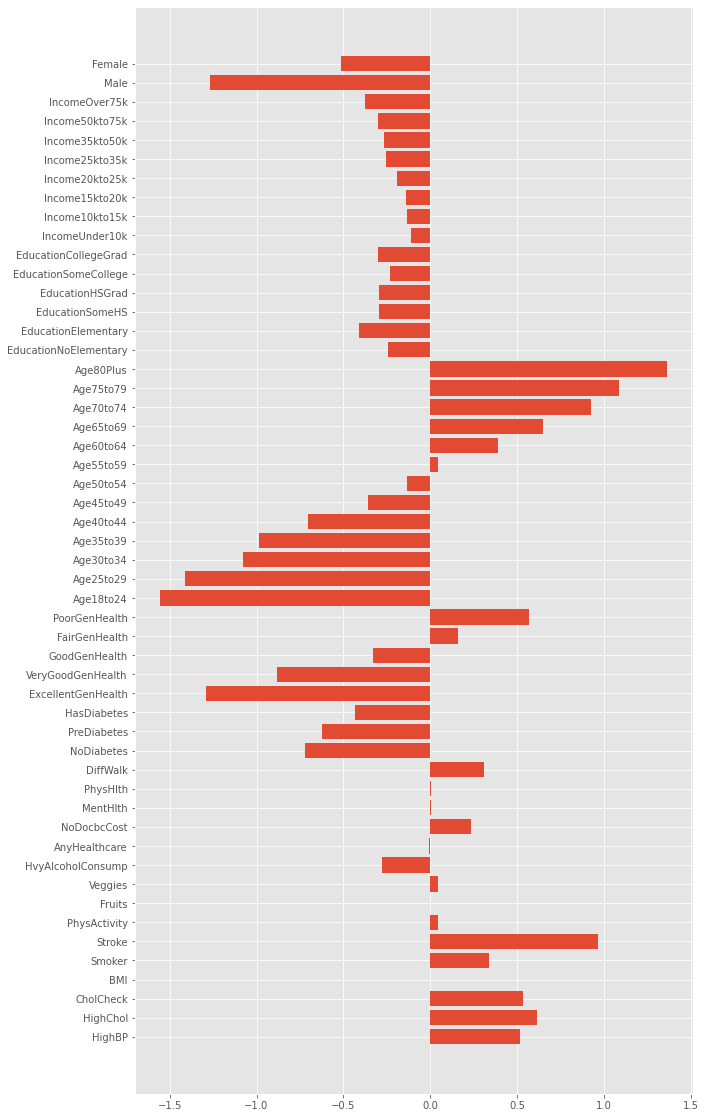

In [56]:
plt.figure(figsize=(10,20))
plt.barh(importances['Attribute'], importances['Importance'])


In [59]:
importances.sort_values(by="Importance")

,Attribute,Importance
23,Age18to24,-1.554315
24,Age25to29,-1.411666
18,ExcellentGenHealth,-1.291799
50,Male,-1.267186
25,Age30to34,-1.080280
26,Age35to39,-0.986937
19,VeryGoodGenHealth,-0.884506
15,NoDiabetes,-0.721718
27,Age40to44,-0.706519
16,PreDiabetes,-0.625254
